## Grant Automatic Access to Employees using Machine Learning

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [5]:
df.nunique()

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In dataset description it is mention that an employee can have only one manager at a time,
then we can consider that the dataset contains information of maximum 4243 employees.

# Plot to show how many Employees were given the access and how many were not given the access



<AxesSubplot:xlabel='ACTION', ylabel='count'>

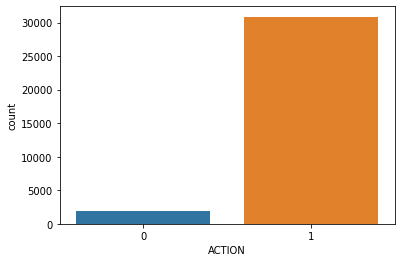

In [6]:
sns.countplot(x='ACTION', data=df)

We can observe that our dataset is highly imbalanced with a ratio of 94:5 and it is a binary classification problem.


In [7]:
##Checking for missing or null values
df.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

There are no missing values in our data set

## Finding Correlation in the data

In [8]:
df.corr()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ACTION,1.000000,0.000185,-0.005167,-0.013702,0.005179,0.001025,-0.010169,0.003565,0.000502,0.017147
RESOURCE,0.000185,1.000000,0.011088,-0.005016,0.013438,0.030004,0.002936,0.021029,0.031060,0.007733
MGR_ID,-0.005167,0.011088,1.000000,-0.007132,-0.000364,-0.009551,0.017864,-0.018488,-0.118254,-0.004067
ROLE_ROLLUP_1,-0.013702,-0.005016,-0.007132,1.000000,0.033358,-0.009548,0.010207,-0.007546,0.029468,-0.024927
ROLE_ROLLUP_2,0.005179,0.013438,-0.000364,0.033358,1.000000,-0.006056,0.008305,0.018873,0.069558,0.015117
ROLE_DEPTNAME,0.001025,0.030004,-0.009551,-0.009548,-0.006056,1.000000,-0.006932,-0.002877,0.031669,0.010319
ROLE_TITLE,-0.010169,0.002936,0.017864,0.010207,0.008305,-0.006932,1.000000,0.170692,-0.012450,0.155920
ROLE_FAMILY_DESC,0.003565,0.021029,-0.018488,-0.007546,0.018873,-0.002877,0.170692,1.000000,-0.180596,0.092980
ROLE_FAMILY,0.000502,0.031060,-0.118254,0.029468,0.069558,0.031669,-0.012450,-0.180596,1.000000,-0.148625
ROLE_CODE,0.017147,0.007733,-0.004067,-0.024927,0.015117,0.010319,0.155920,0.092980,-0.148625,1.000000


## Plotting the correlation for better visualization

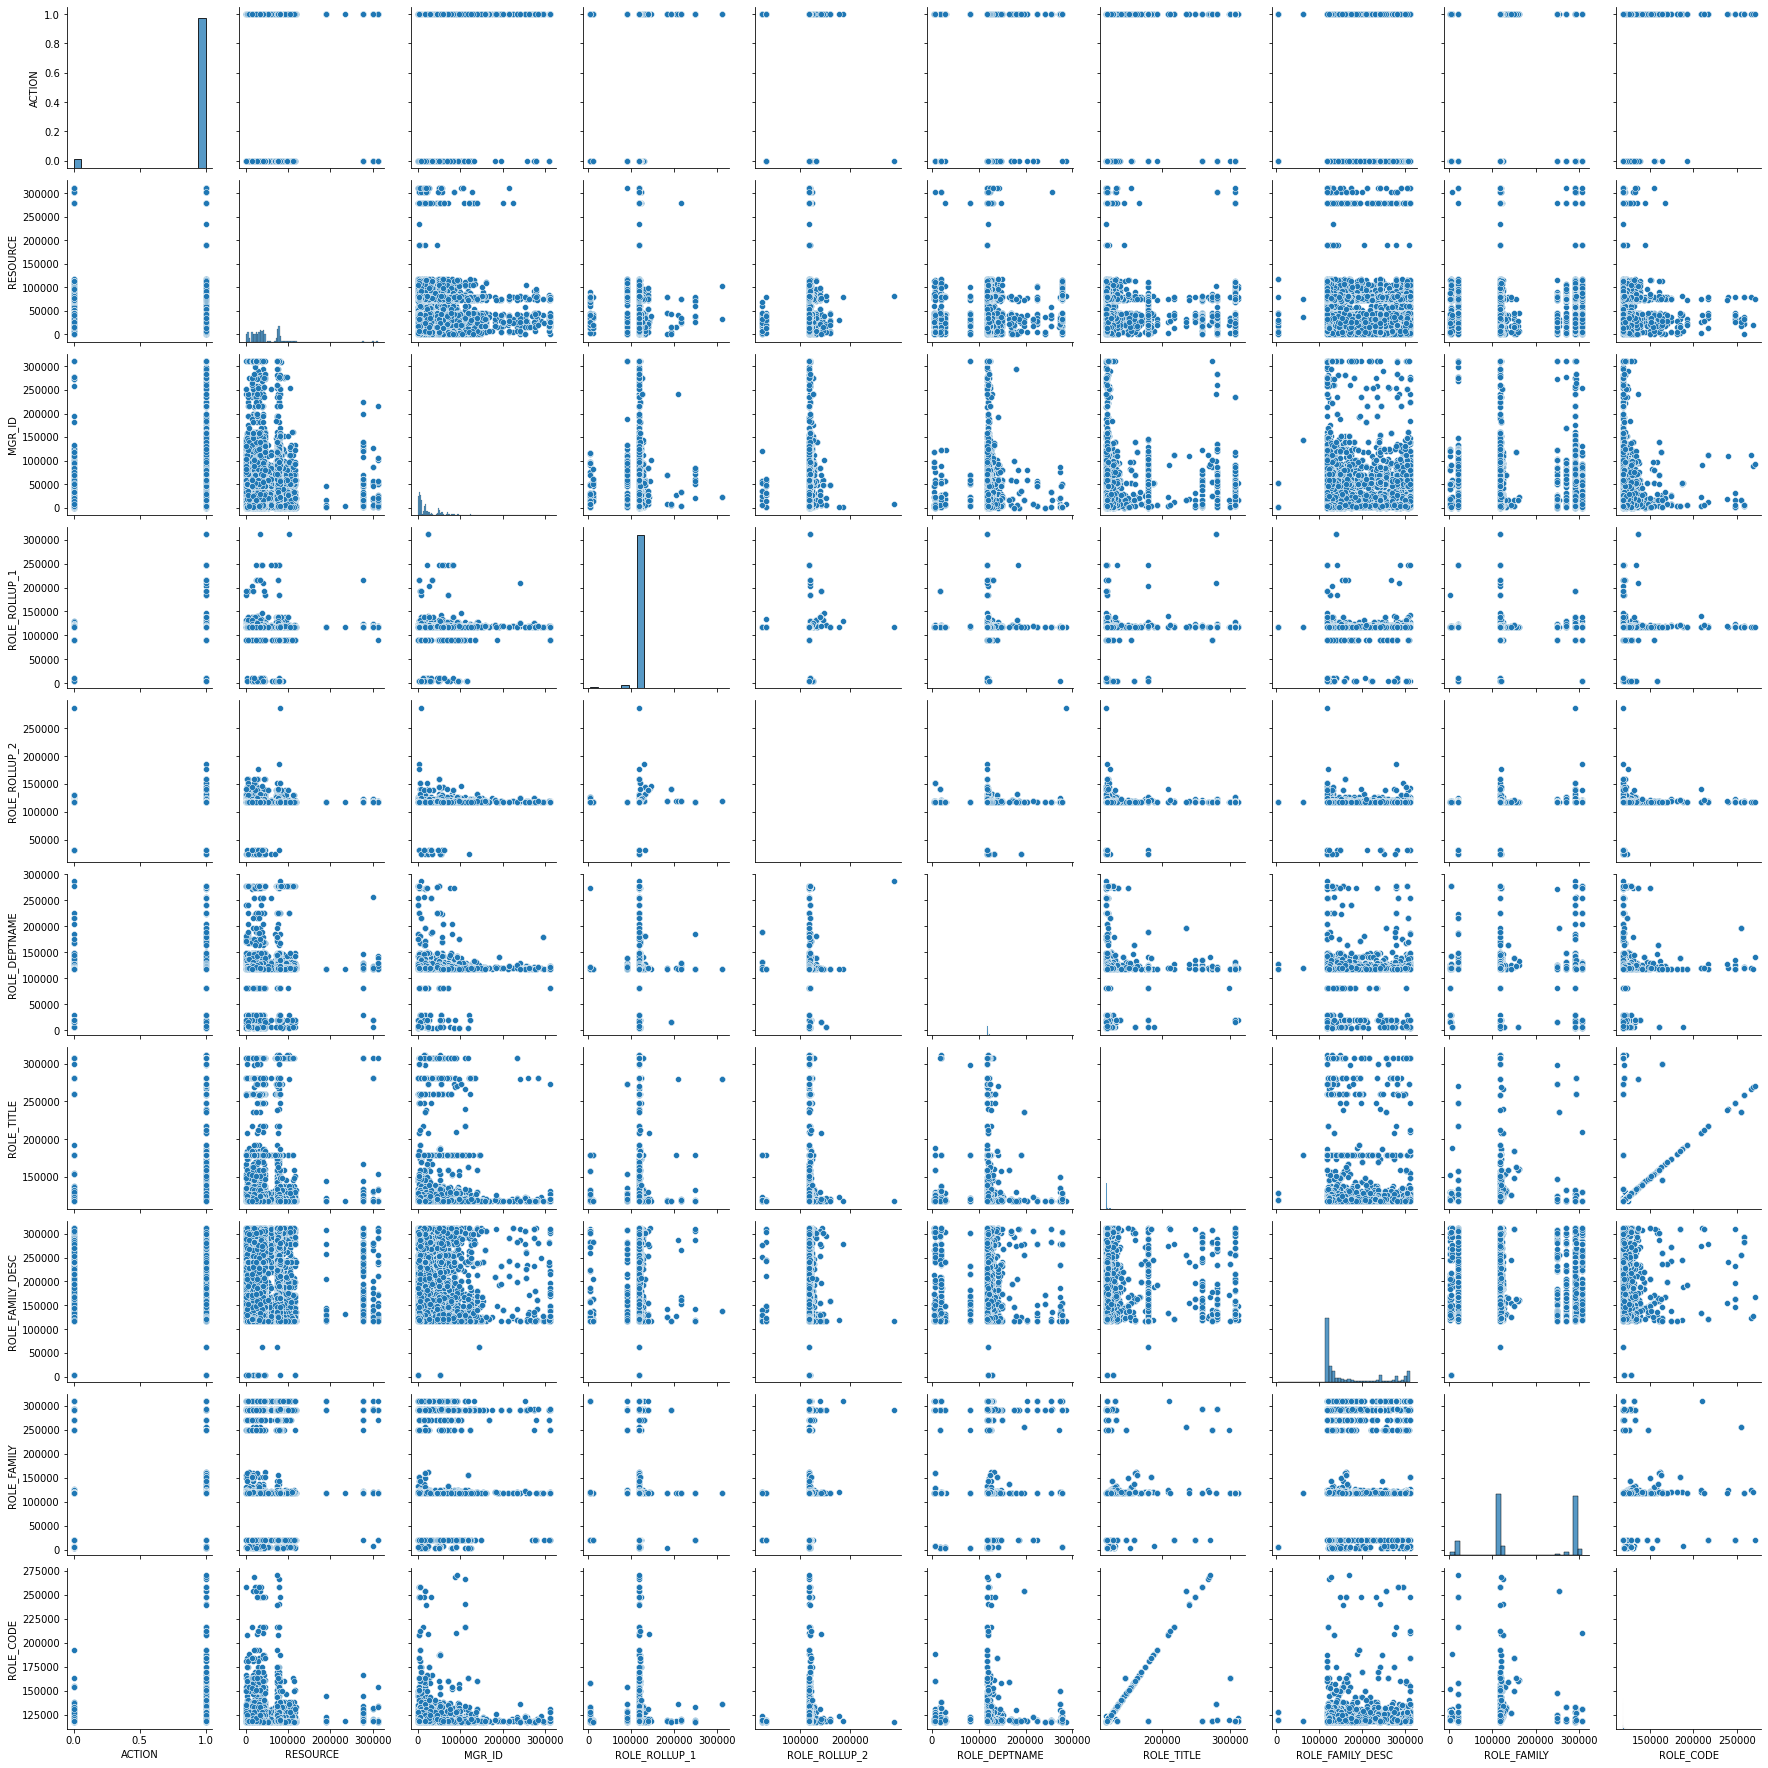

In [9]:
sns.pairplot(df)

In [10]:
## We see that ROLE_TITLE is highly correlated with ROLE_CODE So we can remove ROLE_CODE

In [11]:
final_dataset=df.drop(columns=['ROLE_CODE'])

## Plotting the Heat Map of Correlation for better understanding of the Data

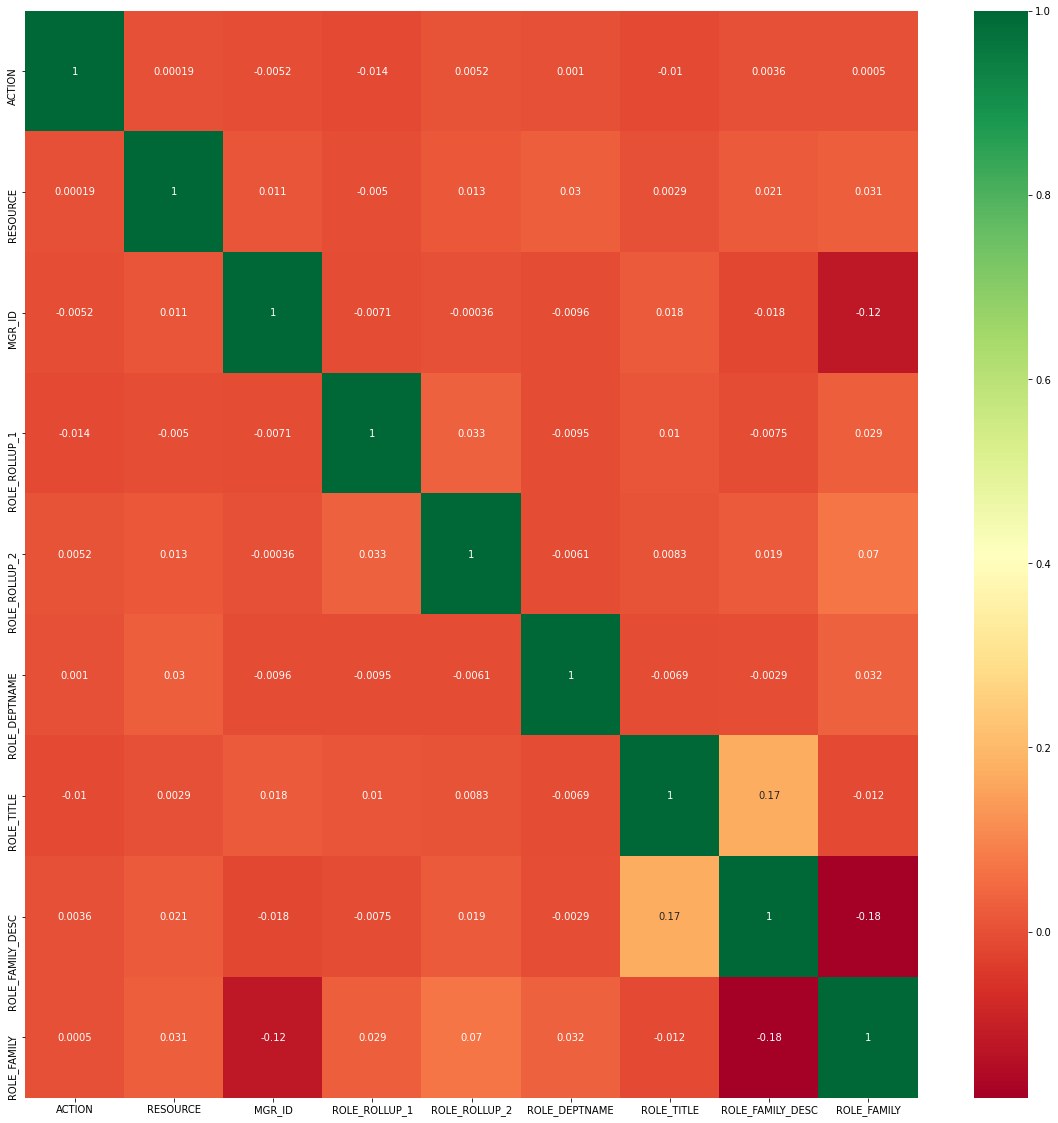

In [12]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')



In [13]:
corrmat['ACTION'].sort_values(ascending=False)

ACTION              1.000000
ROLE_ROLLUP_2       0.005179
ROLE_FAMILY_DESC    0.003565
ROLE_DEPTNAME       0.001025
ROLE_FAMILY         0.000502
RESOURCE            0.000185
MGR_ID             -0.005167
ROLE_TITLE         -0.010169
ROLE_ROLLUP_1      -0.013702
Name: ACTION, dtype: float64

<AxesSubplot:>

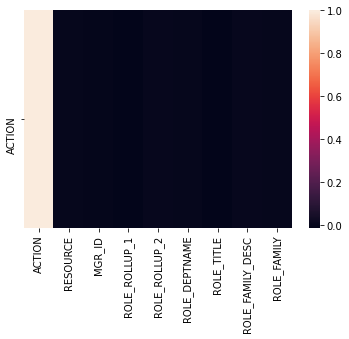

In [14]:
sns.heatmap(final_dataset.corr().loc[['ACTION'],:])

There is No attribute to which target variable is strongly correlated with.

## Data PreProcessing

Defining the Depenedent and Independent variables and dividing them into Training and Testing Set

In [15]:
y=final_dataset['ACTION']

In [16]:
x=final_dataset.drop(columns=['ACTION'])

## Train Test Splitting

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70,test_size=0.30, random_state=42)

In [18]:
print(f"Rows in x_train set:{len(x_train)}\n")
print(f"Rows in x_test set:{len(x_test)}\n")
print(f"Rows in y_train set:{len(y_train)}\n")
print(f"Rows in y_test set:{len(y_test)}\n")

Rows in x_train set:22938

Rows in x_test set:9831

Rows in y_train set:22938

Rows in y_test set:9831



## Applying Different Machine Learning Models on our Dataset

# Logistic Regression

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
#Logistic Regression
LogisticRegressor = LogisticRegression(max_iter=10000)
LogisticRegressor.fit(x_train, y_train)
y_predicted = LogisticRegressor.predict(x_test)


Calculating Mean Squared Error , R Score , Mean Absolute Error and Accuracy Score for Logistic Regression

In [22]:
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print('f1 score:')
print(f1_score(y_test,y_predicted))
print('accuracy score:')
print(accuracy_score(y_test,y_predicted))

Mean Squared Error: 0.05665751195198861
R score: -0.06006038386888046
Mean Absolute Error: 0.05665751195198861
f1 score:
0.9708453284480503
accuracy score:
0.9433424880480114


# Random Forest Classifier

In [23]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train,y_train);
y_predicted_r = rf.predict(x_test)


Calculating Mean Squared Error , R Score , Mean Absolute Error and Accuracy Score for Random Forest Classifier

In [24]:
mse = mean_squared_error(y_test, y_predicted_r)
r = r2_score(y_test, y_predicted_r)
mae = mean_absolute_error(y_test,y_predicted_r)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)
print('f1 score:')
print(f1_score(y_test,y_predicted_r))
print('accuracy score:')
print(accuracy_score(y_test,y_predicted_r))


Mean Squared Error: 0.0549282880683552
R score: -0.027706655815431747
Mean Absolute Error: 0.0549282880683552
f1 score:
0.9711661683041435
accuracy score:
0.9450717119316447


## Support Vector Machine 

In [32]:
#SVM

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred2 = svclassifier.predict(x_test)



Calculating Mean Squared Error , R Score , Mean Absolute Error and Accuracy Score for SVM

In [33]:
mseew = mean_squared_error(y_test, y_pred2)
ra = r2_score(y_test, y_pred2)
maeew = mean_absolute_error(y_test,y_pred2)
print("Mean Squared Error:",mseew)
print("R score:",ra)
print("Mean Absolute Error:",maeew)

print('f1 score:')
print(f1_score(y_test,y_pred2))
print('accuracy score:')
print(accuracy_score(y_test,y_pred2))

Mean Squared Error: 0.05665751195198861
R score: -0.06006038386888046
Mean Absolute Error: 0.05665751195198861
f1 score:
0.9708453284480503
accuracy score:
0.9433424880480114


## Naive Bayes Classifier using Gaussian Naive Bayes Classifier


In [34]:
#Naive Bayes Classifier using Gaussian Naive Bayes Classifier

gnb = GaussianNB()
y_preed = gnb.fit(x_train, y_train).predict(x_test)


Calculating Mean Squared Error , R Score , Mean Absolute Error and Accuracy Score for Gaussian Naive Bayes

In [35]:
ms = mean_squared_error(y_test, y_preed)
rae = r2_score(y_test, y_preed)
mew = mean_absolute_error(y_test,y_preed)
print("Mean Squared Error:",ms)
print("R score:",rae)
print("Mean Absolute Error:",mew)

print('f1 score:')
print(f1_score(y_test,y_preed))
print('accuracy score:')
print(accuracy_score(y_test,y_preed))

Mean Squared Error: 0.08463025124605839
R score: -0.5834295141452577
Mean Absolute Error: 0.08463025124605839
f1 score:
0.9556975505857296
accuracy score:
0.9153697487539416


# K-Nearest Neighbours

Finding the number of neighbours for KNN

In [36]:
math.sqrt(len(y_test))

99.15139938498095

Therefore we choose 99 neighbours for applying KNN classifier

In [37]:
#KNN
classify= KNeighborsClassifier (n_neighbors=99, p =2, metric= 'euclidean')
classify.fit(x_train,y_train)
ypred1=classify.predict(x_test)


Calculating Mean Squared Error , R Score , Mean Absolute Error and Accuracy Score for KNN

In [38]:
msee = mean_squared_error(y_test, ypred1)
r = r2_score(y_test, ypred1)
maee = mean_absolute_error(y_test,ypred1)
print("Mean Squared Error:",msee)
print("R score:",r)
print("Mean Absolute Error:",maee)

print('f1 score:')
print(f1_score(y_test,ypred1))
print('accuracy score:')
print(accuracy_score(y_test,ypred1))

Mean Squared Error: 0.05665751195198861
R score: -0.06006038386888046
Mean Absolute Error: 0.05665751195198861
f1 score:
0.9708453284480503
accuracy score:
0.9433424880480114
